# Data Science Project 3

- Student Name: Natalya Doris
- Student Pace: Flex / 40 weeks
- Scheduled Project Review Date / Time: 
- Instructor Name: Abhineet Kulkarni
- Blog Post URL: 

## Import Statments & Setup

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, \
cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, \
BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, \
precision_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, \
MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

### Possible Data Sources

Startup data - predict success / failure
- https://www.kaggle.com/datasets/chhinna/crunchbase-data?select=round.csv
- https://www.kaggle.com/code/mohammadfikri/startup-success-prediction-precision-recall-94/data?select=startup+data.csv
- https://www.kaggle.com/datasets/arindam235/startup-investments-crunchbase

This dataset is too short, though nice and clean.

In [2]:
df1 = pd.read_csv('data/startup data.csv')
df1.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [3]:
print(df1.info())
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [4]:
df1['status'].value_counts()

acquired    597
closed      326
Name: status, dtype: int64

In [5]:
df2 = pd.read_csv('data/investments_VC.csv', encoding = "ISO-8859-1")
df2.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
print(df2.info())
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,49438.000000,38482.000000,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,...,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04
mean,1.696205,2007.359129,2.173215e+05,7.501051e+06,6.163322e+03,1.302213e+05,2.336410e+04,1.888157e+06,6.541898e+04,1.628453e+05,...,3.845592e+04,7.074227e+03,1.243955e+06,1.492891e+06,1.205356e+06,7.375261e+05,3.424682e+05,1.697692e+05,5.767067e+04,1.423197e+04
std,1.294213,7.579203,1.056985e+06,2.847112e+07,1.999048e+05,2.981404e+06,1.432046e+06,1.382046e+08,6.582908e+05,5.612088e+06,...,3.864461e+06,4.282166e+05,5.531974e+06,7.472704e+06,7.993592e+06,9.815218e+06,5.406915e+06,6.277905e+06,5.252312e+06,2.716865e+06
min,1.000000,1902.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000,2012.000000,2.500000e+04,5.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,18.000000,2014.000000,1.300000e+08,2.351000e+09,2.500000e+07,2.924328e+08,3.000000e+08,3.007950e+10,6.359026e+07,7.505000e+08,...,6.806116e+08,7.200000e+07,3.190000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08


In [7]:
df2['status'].value_counts()

operating    41829
acquired      3692
closed        2603
Name: status, dtype: int64

In [8]:
df2['state_code'].value_counts()

CA    9917
NY    2914
MA    1969
TX    1466
WA     974
      ... 
MB      13
AK      12
NB       8
SK       4
PE       2
Name: state_code, Length: 61, dtype: int64

I am going to use this dataset, as it has many features I can play with and enough rows. It is also decently clean and interpretable from the start.

### Exploratory Analysis

In [237]:
data = df2
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
data.isnull().sum()

permalink                4856
name                     4857
homepage_url             8305
category_list            8817
 market                  8824
 funding_total_usd       4856
status                   6170
country_code            10129
state_code              24133
region                  10129
city                    10972
funding_rounds           4856
founded_at              15740
founded_month           15812
founded_quarter         15812
founded_year            15812
first_funding_at         4856
last_funding_at          4856
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
round_A                  4856
round_B                  4856
round_C   

In [11]:
data['founded_at'].head()

0    2012-06-01
1           NaN
2    2012-10-26
3    2011-04-01
4    2014-01-01
Name: founded_at, dtype: object

In [12]:
data['region'].value_counts()

SF Bay Area      6804
New York City    2577
Boston           1837
London           1588
Los Angeles      1389
                 ... 
Wetzlar             1
West End            1
Enfield Lock        1
GTM - Other         1
Ilford              1
Name: region, Length: 1089, dtype: int64

In [171]:
data['city'].value_counts()

na                      5856
San Francisco           2576
New York                2291
London                  1227
Palo Alto                586
                        ... 
Cantemir                   1
Laupheim                   1
Richmond Upon Thames       1
Cave City                  1
Barrowford                 1
Name: city, Length: 4128, dtype: int64

In [172]:
data['state_code'].value_counts()

na    18573
CA     9732
NY     2858
MA     1937
TX     1436
      ...  
MB       13
AK       12
NB        8
SK        4
PE        2
Name: state_code, Length: 62, dtype: int64

In [173]:
data['country_code'].value_counts()

USA    28233
na      5066
GBR     2595
CAN     1351
CHN     1229
       ...  
LIE        1
JAM        1
UZB        1
MAF        1
MUS        1
Name: country_code, Length: 116, dtype: int64

In [13]:
data['secondary_market'].value_counts()

0.0            49419
200000000.0        1
7343789.0          1
20000000.0         1
12500000.0         1
126700000.0        1
680611554.0        1
400000000.0        1
63750000.0         1
19300000.0         1
4700000.0          1
78800355.0         1
210000000.0        1
2500000.0          1
156929.0           1
700000.0           1
7718867.0          1
6192396.0          1
210000.0           1
60000000.0         1
Name: secondary_market, dtype: int64

In [14]:
data['status'][data['post_ipo_equity'] > 0].value_counts()

operating    247
acquired       7
closed         2
Name: status, dtype: int64

In [15]:
data['status'][data['post_ipo_debt'] > 0].value_counts()

operating    59
acquired      2
Name: status, dtype: int64

In [16]:
data['founded_quarter'].value_counts()

2012-Q1    2904
2011-Q1    2768
2010-Q1    2259
2013-Q1    2206
2009-Q1    1852
           ... 
1988-Q2       1
1973-Q4       1
1919-Q2       1
1992-Q4       1
1939-Q1       1
Name: founded_quarter, Length: 218, dtype: int64

array([[<AxesSubplot:title={'center':'equity_crowdfunding'}>]],
      dtype=object)

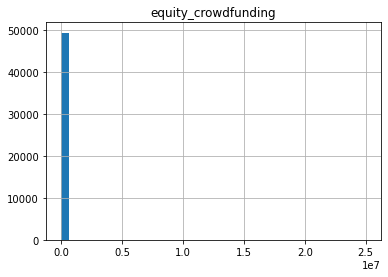

In [17]:
data.hist('equity_crowdfunding', bins=40)

### Preprocessing

In [238]:
data.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [239]:
# getting rid of extra spaces in market and funding_total_usd
data = data.rename(columns={' market ': 'market', 
                            ' funding_total_usd ': 'funding_total_usd'})

Dropping unnecessary columns:

In [240]:
data = data.drop(columns=['permalink', 'homepage_url', 'category_list', 
                          'founded_at', 'founded_month', 'post_ipo_equity', 
                          'post_ipo_debt', 'secondary_market', 
                          'first_funding_at', 'last_funding_at'], 
                 axis=1)

Dealing with missing values:

In [241]:
data = data.dropna(subset=['status', 'name'])
data.isnull().sum()

name                        0
market                   3589
funding_total_usd           0
status                      0
country_code             5066
state_code              18573
region                   5066
city                     5856
funding_rounds              0
founded_quarter         10560
founded_year            10560
seed                        0
venture                     0
equity_crowdfunding         0
undisclosed                 0
convertible_note            0
debt_financing              0
angel                       0
grant                       0
private_equity              0
product_crowdfunding        0
round_A                     0
round_B                     0
round_C                     0
round_D                     0
round_E                     0
round_F                     0
round_G                     0
round_H                     0
dtype: int64

In [242]:
len(data)

48123

In [243]:
data = data.fillna(value={'market': 'na', 'country_code': 'na', 
                          'region': 'na', 'city': 'na', 'founded_quarter': 'na', 
                          'founded_year': 0, 'state_code': 'na'})

In [244]:
data.isna().sum()

name                    0
market                  0
funding_total_usd       0
status                  0
country_code            0
state_code              0
region                  0
city                    0
funding_rounds          0
founded_quarter         0
founded_year            0
seed                    0
venture                 0
equity_crowdfunding     0
undisclosed             0
convertible_note        0
debt_financing          0
angel                   0
grant                   0
private_equity          0
product_crowdfunding    0
round_A                 0
round_B                 0
round_C                 0
round_D                 0
round_E                 0
round_F                 0
round_G                 0
round_H                 0
dtype: int64

In [245]:
# these seem to be international cities, which makes sense
data[data['state_code'].isna()]

,name,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_quarter,...,private_equity,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H


Basic data cleaning:

In [246]:
data.dtypes

name                     object
market                   object
funding_total_usd        object
status                   object
country_code             object
state_code               object
region                   object
city                     object
funding_rounds          float64
founded_quarter          object
founded_year            float64
seed                    float64
venture                 float64
equity_crowdfunding     float64
undisclosed             float64
convertible_note        float64
debt_financing          float64
angel                   float64
grant                   float64
private_equity          float64
product_crowdfunding    float64
round_A                 float64
round_B                 float64
round_C                 float64
round_D                 float64
round_E                 float64
round_F                 float64
round_G                 float64
round_H                 float64
dtype: object

In [247]:
# need to convert this data type to integer
data['funding_total_usd'].value_counts()

 -               8322
 10,00,000        886
 5,00,000         742
 1,00,000         729
 40,000           676
                 ... 
 9,40,00,100        1
 57,312             1
 1,95,607           1
 8,12,35,886        1
 28,17,781          1
Name: funding_total_usd, Length: 14293, dtype: int64

In [28]:
data['funding_total_usd'][8]

' -   '

In [248]:
data['funding_total_usd'] = [float(num.replace(" ", "0").replace(",", "0").\
                                 replace("-", "0")) 
                             for num in data['funding_total_usd']]
data['funding_total_usd'].value_counts()

0.000000e+00    8322
1.000000e+09     886
5.000000e+08     742
1.000000e+08     729
4.000000e+06     676
                ... 
1.700910e+09       1
1.700905e+09       1
1.700900e+09       1
1.063052e+08       1
7.050056e+08       1
Name: funding_total_usd, Length: 14293, dtype: int64

array([[<AxesSubplot:title={'center':'funding_total_usd'}>]], dtype=object)

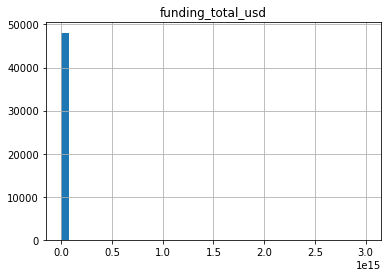

In [249]:
data.hist('funding_total_usd', bins=40)

In [250]:
data['founded_quarter'].head()

0    2012-Q2
1         na
2    2012-Q4
3    2011-Q2
4    2014-Q1
Name: founded_quarter, dtype: object

In [251]:
data['founded_quarter'] = [qtr[-2:] for qtr in data['founded_quarter']]
data['founded_quarter'].head()

0    Q2
1    na
2    Q4
3    Q2
4    Q1
Name: founded_quarter, dtype: object

In [252]:
data['international'] = [0 if country=='USA' else 1 for country in data['country_code']]

### Train Test Split

Splitting out X and Y for train-test split:

In [253]:
X = data.drop(columns=['status', 'name', 'country_code', 'state_code', 
                       'city'], axis=1)

encoder = LabelEncoder()
y = pd.Series(encoder.fit_transform(data['status'])) 
# acquired is 0, closed is 1, operating is 2

In [254]:
X['region'].value_counts().head(400)

SF Bay Area       6687
na                5066
New York City     2528
Boston            1807
London            1554
                  ... 
Hanover              7
Grand Junction       7
Kent                 7
Bordeaux             7
Aachen               7
Name: region, Length: 400, dtype: int64

TypeError: no numeric data to plot

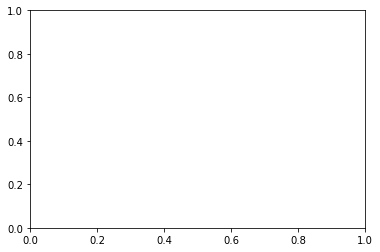

In [36]:
fig, ax = plt.subplots(figsize = (6,4))

# Plots #
    # Plot histogram
#X['region'].plot(kind = "hist", density = True, bins = 15) # change density to true, because KDE uses density
    # Plot KDE
#X['region'].plot(kind = "kde")

(array([26051.,  5471.,  4788.,  2406.,  2106.,  1364.,   942.,   717.,
          482.,   523.,   433.,   404.,   405.,   310.,   239.,   188.,
          198.,   134.,   109.,   143.,   110.,    92.,    99.,    73.,
           79.,    65.,    58.,    52.,    42.,    40.]),
 array([   0. ,   36.2,   72.4,  108.6,  144.8,  181. ,  217.2,  253.4,
         289.6,  325.8,  362. ,  398.2,  434.4,  470.6,  506.8,  543. ,
         579.2,  615.4,  651.6,  687.8,  724. ,  760.2,  796.4,  832.6,
         868.8,  905. ,  941.2,  977.4, 1013.6, 1049.8, 1086. ]),
 <BarContainer object of 30 artists>)

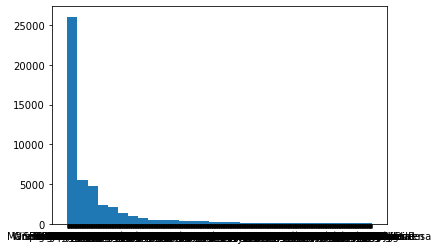

In [35]:
#sns.catplot(x="region", kind="count", palette="ch:.25", data=X)
plt.hist(X['region'], bins=30)

In [255]:
X.dtypes

market                   object
funding_total_usd       float64
region                   object
funding_rounds          float64
founded_quarter          object
founded_year            float64
seed                    float64
venture                 float64
equity_crowdfunding     float64
undisclosed             float64
convertible_note        float64
debt_financing          float64
angel                   float64
grant                   float64
private_equity          float64
product_crowdfunding    float64
round_A                 float64
round_B                 float64
round_C                 float64
round_D                 float64
round_E                 float64
round_F                 float64
round_G                 float64
round_H                 float64
international             int64
dtype: object

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [260]:
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

# Same number of rows in X as values in y
assert X_train.shape[0] == y_train.shape[0]

X_train is a DataFrame with 36092 rows and 25 columns
y_train is a Series with 36092 values


In [181]:
print(y_train.value_counts(normalize=True))

2    0.869971
0    0.076721
1    0.053308
dtype: float64


In [234]:
X_train.columns

Index(['market', 'funding_total_usd', 'region', 'funding_rounds',
       'founded_quarter', 'founded_year', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity',
       'product_crowdfunding', 'round_A', 'round_B', 'round_C', 'round_D',
       'round_E', 'round_F', 'round_G', 'round_H', 'international'],
      dtype='object')

### Preprocessing with Sklearn

Pipeline?

In [ ]:
pipe = Pipeline([
    ("scaler", MinMaxScaler()),
    ("model", LogisticRegression())
])

pipe.fit(X_train, y_train)

Handle missing values:

In [ ]:
# Replace FireplaceQu NaNs with "N/A"s
#X_test["FireplaceQu"] = X_test["FireplaceQu"].fillna("N/A")

# Add missing indicator for lot frontage
#frontage_test = X_test[["LotFrontage"]]
#frontage_missing_test = missing_indicator.transform(frontage_test)
#X_test["LotFrontage_Missing"] = frontage_missing_test

# Impute missing lot frontage values
#frontage_imputed_test = imputer.transform(frontage_test)
#X_test["LotFrontage"] = frontage_imputed_test

# Check that there are no more missing values
#X_test.isna().sum()

All in one step --- skipping this for now

In [ ]:
# Scale continuous values using MinMaxScaler
scaler = MinMaxScaler()
X_train_cont = scaler.fit_transform(X_train_cont)
X_test_cont = scaler.transform(X_test_cont)

# Dummy encode categorical values using OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
X_train_cat = ohe.fit_transform(X_train_cat)
X_test_cat = ohe.transform(X_test_cat)

# Combine everything back together
X_train_preprocessed = np.concatenate([X_train_cont, X_train_cat.todense()], axis=1)
X_test_preprocessed = np.concatenate([X_test_cont, X_test_cat.todense()], axis=1)

Setting aside international feature as it is already processed:

In [ ]:
train_int = X_train['international'].copy().reset_index(drop=True)
test_int = X_test['international'].copy().reset_index(drop=True)

Scale continuous variables using Min Max Scaler:

In [235]:
X_train.dtypes

market                   object
funding_total_usd         int64
region                   object
funding_rounds          float64
founded_quarter          object
founded_year            float64
seed                    float64
venture                 float64
equity_crowdfunding     float64
undisclosed             float64
convertible_note        float64
debt_financing          float64
angel                   float64
grant                   float64
private_equity          float64
product_crowdfunding    float64
round_A                 float64
round_B                 float64
round_C                 float64
round_D                 float64
round_E                 float64
round_F                 float64
round_G                 float64
round_H                 float64
international             int64
dtype: object

In [275]:
X_train_cont = X_train.select_dtypes(exclude=['object','int64']).reset_index(drop=True)
X_test_cont = X_test.select_dtypes(exclude=['object','int64']).reset_index(drop=True)

# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform X_train
X_train_cont_scaled = scaler.fit_transform(X_train_cont)
X_train_cont_scaled = pd.DataFrame(X_train_cont_scaled, columns=X_train_cont.columns)

# Transform X_test
X_test_cont_scaled = scaler.transform(X_test_cont)
X_test_cont_scaled = pd.DataFrame(X_test_cont_scaled, columns=X_test_cont.columns)

In [279]:
X_train.reset_index(drop=True)

,market,funding_total_usd,region,funding_rounds,founded_quarter,founded_year,seed,venture,equity_crowdfunding,undisclosed,...,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,international
0,Hardware + Software,1.407500e+09,Napa Valley,1.0,Q1,2007.0,0.0,1475000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,Manufacturing,4.600000e+09,Los Angeles,1.0,Q1,2007.0,0.0,4600000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,Personalization,3.800000e+09,SF Bay Area,2.0,Q4,2008.0,0.0,3800000.0,0.0,0.0,...,0.0,1500000.0,2300000.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,na,2.000000e+06,Honolulu,1.0,na,0.0,20000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,Reviews and Recommendations,5.204300e+06,Madrid,1.0,Q1,2012.0,52430.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36087,Messaging,1.030000e+11,Beijing,2.0,na,0.0,0.0,13000000.0,0.0,0.0,...,0.0,13000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
36088,Video Streaming,5.800000e+12,New York City,4.0,Q4,2006.0,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
36089,Finance,5.030084e+11,Beijing,3.0,na,0.0,0.0,53084832.0,0.0,0.0,...,0.0,3084832.0,10000000.0,40000000.0,0.0,0.0,0.0,0.0,0.0,1
36090,Social Media,0.000000e+00,Seattle,1.0,Q1,1983.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


One hot encode categorical variables:

In [280]:
#cat_columns = ['market', 'country_code', 'state_code', 'region', 
#               'city', 'founded_quarter']

cat_columns = ['market', 'region', 'founded_quarter']

cat_train = X_train[cat_columns].reset_index(drop=True)
cat_test = X_test[cat_columns].reset_index(drop=True)

In [281]:
ohe = OneHotEncoder(handle_unknown = 'ignore')

encoded_train = ohe.fit_transform(cat_train).toarray()

X_train_cat = pd.DataFrame(encoded_train, columns=ohe.get_feature_names(cat_train.columns))

In [290]:
X_train_processed = pd.concat([X_train_cat, X_train_cont, train_int], axis=1)
X_train_scaled = pd.concat([X_train_cat, X_train_cont_scaled, train_int], axis=1) 

display(X_train_processed.head())
X_train_scaled.head()

,market_ 3D,market_ 3D Printing,market_ 3D Technology,market_ Accounting,market_ Ad Targeting,market_ Advanced Materials,market_ Adventure Travel,market_ Advertising,market_ Advertising Exchanges,market_ Advertising Networks,...,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,international
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1500000.0,2300000.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


,market_ 3D,market_ 3D Printing,market_ 3D Technology,market_ Accounting,market_ Ad Targeting,market_ Advanced Materials,market_ Adventure Travel,market_ Advertising,market_ Advertising Exchanges,market_ Advertising Networks,...,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,international
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.004702,0.004244,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1


Transforming test data:

In [204]:
X_test.dtypes

market                   object
funding_total_usd         int64
region                   object
funding_rounds          float64
founded_quarter          object
founded_year            float64
seed                    float64
venture                 float64
equity_crowdfunding     float64
undisclosed             float64
convertible_note        float64
debt_financing          float64
angel                   float64
grant                   float64
private_equity          float64
product_crowdfunding    float64
round_A                 float64
round_B                 float64
round_C                 float64
round_D                 float64
round_E                 float64
round_F                 float64
round_G                 float64
round_H                 float64
international             int64
dtype: object

In [288]:
encoded_test = ohe.transform(cat_test).toarray()

X_test_cat = pd.DataFrame(encoded_test, columns=ohe.get_feature_names(cat_test.columns))

X_test_scaled = pd.concat([X_test_cat, X_test_cont_scaled, test_int], axis=1)
X_test_processed = pd.concat([X_test_cat, X_test_cont, test_int], axis=1)

display(X_test_processed.head())
X_test_scaled.head()

,market_ 3D,market_ 3D Printing,market_ 3D Technology,market_ Accounting,market_ Ad Targeting,market_ Advanced Materials,market_ Adventure Travel,market_ Advertising,market_ Advertising Exchanges,market_ Advertising Networks,...,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,international
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


,market_ 3D,market_ 3D Printing,market_ 3D Technology,market_ Accounting,market_ Ad Targeting,market_ Advanced Materials,market_ Adventure Travel,market_ Advertising,market_ Advertising Exchanges,market_ Advertising Networks,...,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,international
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.015674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [291]:
print("There are {} features in train set".format(len(X_train_processed.columns)))
print("There are {} features in test set".format(len(X_test_processed.columns)))

There are 1755 features in train set
There are 1755 features in test set


In [292]:
print("There are {} features in train set (scaled)".format(len(X_train_scaled.columns)))
print("There are {} features in test set (scaled)".format(len(X_test_scaled.columns)))

There are 1755 features in train set (scaled)
There are 1755 features in test set (scaled)


## Baseline Model

Logistic regression:

In [293]:
baseline_model = LogisticRegression(random_state=42)

baseline_model.fit(X_train_scaled, y_train)

#baseline_model.score

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model
# on X_train and y_train
#baseline_neg_log_loss_cv = cross_val_score(baseline_model, X_train, y_train, scoring="neg_log_loss")

#baseline_log_loss = -(baseline_neg_log_loss_cv.mean())
#baseline_log_loss

LogisticRegression(random_state=42)

In [294]:
y_hat_train = baseline_model.predict(X_train_scaled)

In [295]:
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.25      0.00      0.00      2769
           1       1.00      0.00      0.00      1924
           2       0.87      1.00      0.93     31399

    accuracy                           0.87     36092
   macro avg       0.71      0.33      0.31     36092
weighted avg       0.83      0.87      0.81     36092



In [296]:
y_hat_test = baseline_model.predict(X_test_scaled)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.33      0.00      0.00       923
           1       0.00      0.00      0.00       678
           2       0.87      1.00      0.93     10430

    accuracy                           0.87     12031
   macro avg       0.40      0.33      0.31     12031
weighted avg       0.78      0.87      0.81     12031



In [98]:
## WHAT IS THIS SAYING??
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))
#print(classification_report(y_test, y_hat_test))

0    31427
2     2758
1     1907
dtype: int64
------------------------------------
0    0.870747
2    0.076416
1    0.052837
dtype: float64


In [164]:
baseline_model.coef_

array([[-0.07426328, -0.15487386, -0.07249464, ..., -0.43627175,
        -0.12198941, -0.02738445],
       [ 0.06810978, -0.14269419, -0.06940142, ...,  0.17538423,
         0.00863807, -0.00825094],
       [ 0.0061535 ,  0.29756805,  0.14189606, ...,  0.26088752,
         0.11335135,  0.03563539]])

In [170]:
coef_df = pd.DataFrame(baseline_model.coef_, columns=X_train.columns)
coef_df.to_csv('coef_logreg_base2.csv')

In [167]:
X_train.columns

Index(['market_ 3D ', 'market_ 3D Printing ', 'market_ 3D Technology ',
       'market_ Accounting ', 'market_ Ad Targeting ',
       'market_ Advanced Materials ', 'market_ Adventure Travel ',
       'market_ Advertising ', 'market_ Advertising Exchanges ',
       'market_ Advertising Networks ',
       ...
       'private_equity', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object', length=5508)

In [102]:
print('Training Precision (weighted avg): ', 
      precision_score(y_train, y_hat_train, average='weighted'))
print('Testing Precision (weighted avg): ', 
      precision_score(y_test, y_hat_test, average='weighted'))
print('\n\n')

print('Training Recall (weighted avg): ', 
      recall_score(y_train, y_hat_train, average='weighted'))
print('Testing Recall (weighted avg): ', 
      recall_score(y_test, y_hat_test, average='weighted'))
print('\n\n')

print('Training F1-Score (weighted avg): ', 
      f1_score(y_train, y_hat_train, average='weighted'))
print('Testing F1-Score (weighted avg): ', 
      f1_score(y_test, y_hat_test, average='weighted'))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))

Training Precision (weighted avg):  0.8422235083821834
Testing Precision (weighted avg):  0.7710266272489164



Training Recall (weighted avg):  0.8707469799401529
Testing Recall (weighted avg):  0.8659296816557227



Training F1-Score (weighted avg):  0.8129091819813385
Testing F1-Score (weighted avg):  0.8053758639591745



Training Accuracy:  0.8707469799401529
Testing Accuracy:  0.8659296816557227


In [101]:
print('Training Precision (macro avg): ', 
      precision_score(y_train, y_hat_train, average='macro'))
print('Testing Precision (macro avg): ', 
      precision_score(y_test, y_hat_test, average='macro'))
print('\n\n')

print('Training Recall (macro avg): ', 
      recall_score(y_train, y_hat_train, average='macro'))
print('Testing Recall (macro avg): ', 
      recall_score(y_test, y_hat_test, average='macro'))
print('\n\n')

print('Training F1-Score (macro avg): ', 
      f1_score(y_train, y_hat_train, average='macro'))
print('Testing F1-Score (macro avg): ', 
      f1_score(y_test, y_hat_test, average='macro'))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))

Training Precision (macro avg):  0.7349520211232621
Testing Precision (macro avg):  0.3724183877415057



Training Recall (macro avg):  0.3411560253287069
Testing Recall (macro avg):  0.3342665526803914



Training F1-Score (macro avg):  0.3262457337001421
Testing F1-Score (macro avg):  0.31225547537247195



Training Accuracy:  0.8707469799401529
Testing Accuracy:  0.8659296816557227


## Other Models

### Model 2: LogReg / Addressing Class Imbalance

In [297]:
# fitting a model weight balanced class weights, no regularization
logreg2 = LogisticRegression(random_state=42, class_weight='balanced')
logreg2.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [298]:
y_hat_train_2 = logreg2.predict(X_train_scaled)
y_hat_test_2 = logreg2.predict(X_test_scaled)

In [299]:
print(classification_report(y_train, y_hat_train_2))
print(classification_report(y_test, y_hat_test_2))

              precision    recall  f1-score   support

           0       0.17      0.61      0.26      2769
           1       0.13      0.61      0.21      1924
           2       0.95      0.52      0.67     31399

    accuracy                           0.53     36092
   macro avg       0.42      0.58      0.38     36092
weighted avg       0.85      0.53      0.62     36092

              precision    recall  f1-score   support

           0       0.15      0.53      0.23       923
           1       0.10      0.43      0.16       678
           2       0.93      0.50      0.65     10430

    accuracy                           0.50     12031
   macro avg       0.39      0.49      0.35     12031
weighted avg       0.82      0.50      0.59     12031



In [112]:
# Without regularization - better for training, worse for test - overfit

logreg3 = LogisticRegression(random_state=42, class_weight='balanced', C=1e12)
logreg3.fit(X_train_scaled, y_train)
y_hat_train_3 = logreg3.predict(X_train_scaled)
y_hat_test_3 = logreg3.predict(X_test_scaled)
print(classification_report(y_train, y_hat_train_3))
print(classification_report(y_test, y_hat_test_3))

              precision    recall  f1-score   support

           0       0.20      0.67      0.31      2769
           1       0.16      0.68      0.25      1924
           2       0.96      0.56      0.71     31399

    accuracy                           0.58     36092
   macro avg       0.44      0.64      0.42     36092
weighted avg       0.86      0.58      0.65     36092

              precision    recall  f1-score   support

           0       0.15      0.49      0.23       923
           1       0.09      0.39      0.15       678
           2       0.92      0.54      0.68     10430

    accuracy                           0.53     12031
   macro avg       0.39      0.47      0.35     12031
weighted avg       0.81      0.53      0.62     12031



### Model 3: Random Forest

In [300]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_processed, y_train)

y_hat_train_3 = rfc.predict(X_train_processed)
y_hat_test_3 = rfc.predict(X_test_processed)

print(classification_report(y_train, y_hat_train_3))
print(classification_report(y_test, y_hat_test_3))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2769
           1       0.99      0.96      0.98      1924
           2       1.00      1.00      1.00     31399

    accuracy                           1.00     36092
   macro avg       1.00      0.98      0.99     36092
weighted avg       1.00      1.00      1.00     36092

              precision    recall  f1-score   support

           0       0.26      0.03      0.05       923
           1       0.24      0.02      0.03       678
           2       0.87      0.99      0.93     10430

    accuracy                           0.86     12031
   macro avg       0.46      0.35      0.34     12031
weighted avg       0.79      0.86      0.81     12031



In [114]:
# Tuning the model with grid search

param_grid = {'criterion':['gini','entropy','log_loss'],
              'max_depth':[3,8,12],
              'min_samples_leaf': [5,10],
              'class_weight': [None, 'balanced']
             }

In [118]:
## long run time

grid_rfc = GridSearchCV(rfc, param_grid, cv = 5, scoring='recall_weighted') 
# macro or weighted?
grid_rfc.fit(X_train, y_train) #17 min execution

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 8, 12], 'min_samples_leaf': [5, 10]},
             scoring='recall_weighted')

In [119]:
grid_rfc.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 5}

In [120]:
y_preds_grid = grid_rfc.predict(X_test)

In [121]:
display(confusion_matrix(y_test, y_preds_grid))
print(classification_report(y_test, y_preds_grid))

array([[    0,     0,   923],
       [    0,     0,   678],
       [    0,     0, 10430]])

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       923
           1       0.00      0.00      0.00       678
           2       0.87      1.00      0.93     10430

    accuracy                           0.87     12031
   macro avg       0.29      0.33      0.31     12031
weighted avg       0.75      0.87      0.81     12031



### Model 4: Gradient Boosted Trees

In [301]:
clf = XGBClassifier(random_state=42) ## long run time
clf.fit(X_train_processed, y_train)

y_hat_train_clf = clf.predict(X_train_processed)
y_hat_test_clf = clf.predict(X_test_processed)

print(classification_report(y_train, y_hat_train_clf))
print(classification_report(y_test, y_hat_test_clf))

              precision    recall  f1-score   support

           0       0.85      0.11      0.20      2769
           1       0.89      0.05      0.10      1924
           2       0.88      1.00      0.94     31399

    accuracy                           0.88     36092
   macro avg       0.87      0.39      0.41     36092
weighted avg       0.88      0.88      0.83     36092



In [302]:
y_hat_test_clf = clf.predict(X_test_processedcessedocessed)
print(classification_report(y_test, y_hat_test_clf))

              precision    recall  f1-score   support

           0       0.46      0.05      0.09       923
           1       0.25      0.01      0.02       678
           2       0.87      0.99      0.93     10430

    accuracy                           0.87     12031
   macro avg       0.53      0.35      0.34     12031
weighted avg       0.80      0.87      0.81     12031



In [ ]:
## Can grid search to find ideal weights

# making it two dimensional rather than 3 dimensional?
# reducing number of categories in city / region? i.e. if less than x companies
# in city then include in 'other' category
# 5000 columns too many? what's a good guideline for knowing when there are
# too many parameters
# how much should I be feature engineering?

# business problem
# private equity company that wants to know when a startup will fail
# want to know warning signals if project is going to go badly

## Build Pipeline

In [ ]:
# Want to create a pipeline so we can test different kinds of models 
# more easly